# Spatial Operations 空域运算
## 点运算

![](images/PointOperations.png)

## 邻域运算
![](images/NeighborhoodOperations.png)

# 1. 对比度拉伸
Contrast Stretching
## 原理

对比度拉伸，也被称为对比度拉伸增强或对比度扩展，是一种图像增强技术，其目的是提高图像的对比度。这种技术通常在图像的对比度较低时使用，例如在雾天拍摄的图片或在某些医学成像应用中。

主要作用：将原始图像的灰度级从一个较小的范围扩展到更广的范围。

![](images/ContrastThreshold.png)


例如：一个图像的像素值主要集中在100到150之间，说明图像可能比较暗淡和对比度低。对比度拉伸可以将这些值重新映射，使得它们覆盖更大的范围（0～255），从而使图像看起来更明亮，对比度更高。


实现步骤：
1. 设定图像中的最低灰度值（$L$）和最高灰度值（$H$）。
2. 对图像中的每个像素值 $f(x,y)$ 应用以下线性变换：

$$
f'(x,y)=\frac{f(x,y)-L}{H-L}\times 25
$$

其中 $f'(x,y)$ 是调整后的像素值，灰度值范围就会从 $L\sim H$ 变成 $0\sim255$。
（低于 $L$ 映射为 $0$，高于 $H$ 映射为 $255$）


它源于数据归一化，将数据调整到 [0,1] 范围内

$$
\frac{x-x_{min}}{x_{max}-x_{min}}
$$

## 拓展

### 将灰度映射至任意范围
- 设像素值范围为 [a, b]，我们想将其拉伸到 [c, d]，则对比度拉伸可以表示为：

$$
s = \frac{(d-c)(r-a)}{b-a} + c
$$

其中：
- r 是原始图像的像素值。
- s 是拉伸后的像素值。
- a 是原始图像的最小像素值。
- b 是原始图像的最大像素值。
- c 和 d 是拉伸后的像素值范围。

### 分段对比度拉伸

![](images/分段对比度拉伸.png)


## 实现

使用OpenCV，对比度拉伸可以简单地使用`cv2.normalize()`函数实现，例如：

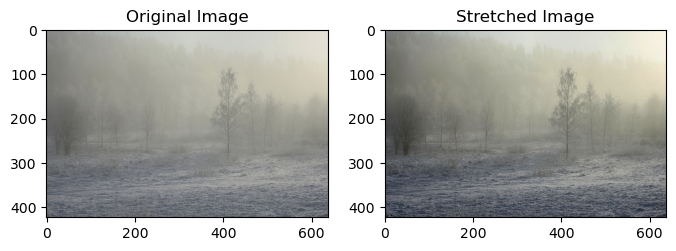

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
original_image = cv2.cvtColor(cv2.imread('images/Landscape4ContrastStretching.png'), cv2.COLOR_BGR2RGB)

# 对比度拉伸
stretched_image = cv2.normalize(original_image, None, 0, 255, cv2.NORM_MINMAX)

# 显示原始和拉伸后的图像
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray');
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray');
plt.title('Stretched Image')
plt.show()

这种方法同样可以应用于彩色图像的每个通道，但请注意，直接对RGB图像的每个通道进行操作可能会导致颜色失真。在某些情况下，可能更适合先将图像转换到其他颜色空间（如HSV或LAB）并仅拉伸亮度或亮度通道。

当图片的灰度最小值不等于 0 时，或者灰度最大值不等于 255，需要做对比度拉伸。
解决图像灰度范围不够广，图像的动态范围。通常是图像处理最后一步。

## 根据公式手动实现

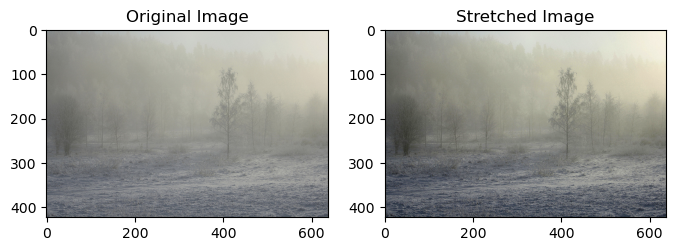

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
original_image = cv2.cvtColor(cv2.imread('images/Landscape4ContrastStretching.png'), cv2.COLOR_BGR2RGB)


def contrast_stretching(original_image, max_out=255):
    min_val = np.min(original_image)
    max_val = np.max(original_image)
    stretched_image = (original_image - min_val) / (max_val - min_val) * max_out
    return stretched_image.astype(np.uint8)


# 对比度拉伸
stretched_image = contrast_stretching(original_image, 255)

# 显示原始和拉伸后的图像
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')
plt.show()

Tips：对比度拉伸灰度图可能会看不清。

# 2. 强度阈值化

结果：将图像从灰度图转换为二值图像。

基本思想：假设图像中有明显的目标和背景，则其灰度直方图呈双峰分布，当灰度级直方图具有双峰特性时，<u>选取两峰之间的谷对应的灰度级作为阈值</u>。

![mode](assets/mode.png)

## 2.1 固定阈值

设置一个特定的阈值。高于阈值的像素将被设置为一个值（白色），而低于阈值的像素将被设置为另一个值（黑色）。


实现步骤：
1. 选择阈值：设定一个灰度级阈值 $T$
2. 应用阈值：对图像中的每个像素 $f(x,y)$ 进行如下操作：
- 如果 $f(x,y)\ge T$，则 $f'(x,y)=MAX$（255，白色）
- 如果 $f(x,y)< T$，则 $f'(x,y)= MIN$（0，黑色）

效果：阈值化后的图像只包含两种颜色，使得图像的某些特征更加突出。





![](images/强度阈值化.png)



函数： `cv2.threshold(src, thresh, maxval, type)`

参数说明：
- 参数1： 原图像
- 参数2： 对像素值进行分类的阈值
- 参数3： 当像素值高于(小于)阈值时，应该被赋予的新的像素值
- 参数4： 第四个参数是阈值方法。

返回值有两个：
1. `ret`：一个整数值，表示阈值操作的结果。对于二值化操作，这个值通常会根据操作类型有所不同：
- 如果成功执行了阈值操作，`ret` 通常为 0。
- 如果遇到错误，`ret` 可能不为 0，具体含义取决于 OpenCV 的实现。
2. `thresholded_img`：处理后的图像，二值化后的结果。



![threshold](assets/fix_threshold.png)

True


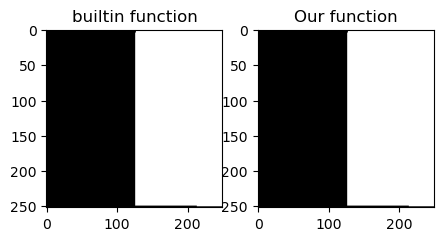

In [49]:
import cv2
import matplotlib.pyplot as plt

# 灰度图读入
img = cv2.imread('./images/thresh.png', 0)
threshold = 127

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
# 阈值分割
_, th = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray');
plt.title('builtin function')

# img > threshold 逻辑判断返回 0-1
img_thresh = (img > threshold) * 255
plt.subplot(1, 2, 2)
plt.imshow(img_thresh, cmap='gray');
plt.title('Our function')

print(np.array_equal(th, img_thresh))  # 判断我们两种方法生成的array是否相等

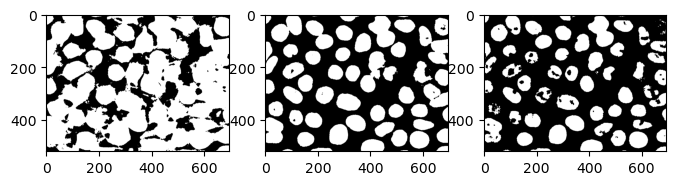

In [41]:
img2 = cv2.imread('images/sample-强度阈值化.png', 0)
thresholds = [50, 80, 100]

plt.figure(figsize=(8, 8))
for i in range(len(thresholds)):
    plt.subplot(1, len(thresholds), i + 1)
    img_thresh = (img2 > thresholds[i])  # * 255
    plt.imshow(img_thresh, cmap='gray')

结果极大地依赖于阈值的设定
- 阈值过小：图像偏白
- 阈值过大：图像偏黑

小结
- 对比度拉伸的极限情况。
- 生成灰度图像的二值图像。
- 将阈值以下的值设为黑色，将阈值以上（包括阈值）的值设为白色。
- 结果极大地依赖于阈值的设定。

### 练习题

![](images/强度阈值例题.png)

![](images/强度阈值例题答案.png)

### 其他的固定阈值函数

- `THRESH_BINARY`：$\operatorname{det}(x, y)= \begin{cases}\text { maxval } & \text { if } \operatorname{src}(x, y)>\text { thresh } \\ 0 & \text { otherwise }\end{cases}$
- `THRESH_BINARY_INV`：$\operatorname{dst}(x, y)= \begin{cases}0 & \text { if } \operatorname{arc}(x, y)>\text { threshold } \\ \text { maxval } & \text { otherwise }\end{cases}$
- `THRESH_TRUNC`：$\operatorname{dst}(x, y)= \begin{cases}\operatorname{threshold} & \text { if } \operatorname{src}(x, y)>\operatorname{threshold} \\ \operatorname{src}(x, y) & \text { otherwise }\end{cases}$
- `THRESH_TOZERO`：$\operatorname{dst}(x, y)= \begin{cases}\operatorname{src}(x, y) & \text { if } \operatorname{src}(x, y)>\operatorname{threshold} \\ 0 & \text { otherwise }\end{cases}$
- `THRESH_TOZERO_INV`：$\operatorname{dst}[x, y)= \begin{cases}0 & \text { if } \operatorname{src}(x, y)>\text { threshold } \\ \operatorname{src}(x, y) & \text { otherwise }\end{cases}$

### 固定阈值不同方法比较

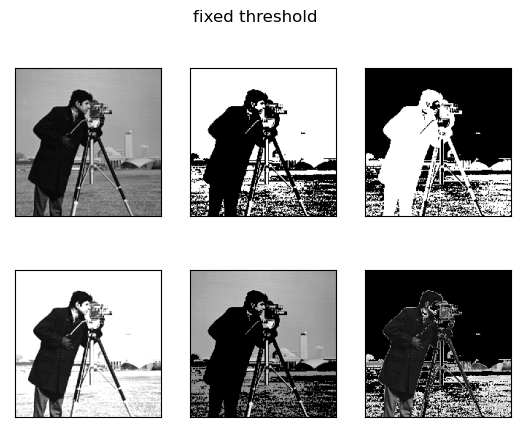

In [5]:
#导入第三方包
import cv2
from matplotlib import pyplot as plt

# 
#opencv读取图像
img = cv2.imread('./images/person.png', 0)
# 5 种阈值法图像分割
_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
#使用for循环进行遍历，matplotlib进行显示
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.suptitle('fixed threshold')
plt.show()

## 2.2 自动阈值

### 2.2.1 Isodata 迭代法阈值

步骤

1. 求出图象的最大灰度值和最小灰度值，分别记为 $Z_{\max}$ 和 $Z_{\min}$，令初始阈值 $T_0=(Z_{\max}+Z_{\min})/2$；
2. 根据阈值 $T_K$ 将图象分割为前景和背景，分别求出两者的平均灰度值 $Z_O$ 和 $Z_B$ ；
3. 求出新阈值 $T_{K+1}=(Z_O+Z_B)/2$；
4. 若 $T_K==T_{K+1}$，则所得即为阈值；否则转 2，迭代计算；
5. 使用计算后的阈值进行固定阈值分割。

120.0


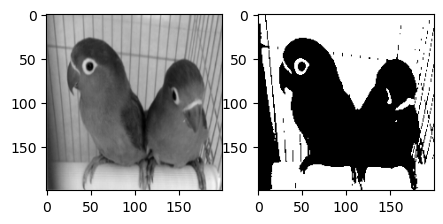

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def best_thresh(img):
    img_array = np.array(img).astype(np.float32)  #转化成数组
    I = img_array
    zmax = np.max(I)
    zmin = np.min(I)
    tk = (zmax + zmin) / 2  #设置初始阈值
    #根据阈值将图像进行分割为前景和背景，分别求出两者的平均灰度zo和zb
    b = 1
    m, n = I.shape
    while b == 0:
        ifg = 0
        ibg = 0
        fnum = 0
        bnum = 0
        for i in range(1, m):
            for j in range(1, n):
                tmp = I(i, j)
                if tmp >= tk:
                    ifg = ifg + 1
                    fnum = fnum + int(tmp)  #前景像素的个数以及像素值的总和
                else:
                    ibg = ibg + 1
                    bnum = bnum + int(tmp)  #背景像素的个数以及像素值的总和
        #计算前景和背景的平均值
        zo = int(fnum / ifg)
        zb = int(bnum / ibg)
        if tk == int((zo + zb) / 2):
            b = 0
        else:
            tk = int((zo + zb) / 2)
    return tk


img = cv2.imread("./images/bird.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(gray, (200, 200))  #大小
yvzhi = best_thresh(img)
ret1, th1 = cv2.threshold(img, yvzhi, 255, cv2.THRESH_BINARY)
print(ret1)
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(th1, cmap='gray')
plt.show()

### 2.2.2 Otsu大津法

最大类间方差法， 1979年日本学者大津提出，是一种基于<u>全局阈值</u>的自适应方法。

灰度特性：图像分为前景和背景。当取最佳阈值时，两部分之间的差别应该是最大的，衡量差别的标准为最大类间方差。

直方图有两个峰值的图像，大津法求得的Ｔ近似等于两个峰值之间的低谷。

![](assets/otsu.png)



$$
\begin{align}
\omega_1&=\frac{N_1}{M \times N} \\
\omega_2&=\frac{N_2}{M \times N} \\
N_1+N_2&=M \times N \\
\omega_1+\omega_2&=1 \\
\mu&=\mu_1 \times \omega_1+\mu_2 \times \omega_2 \\
g&=\omega_1 \times\left(\mu-\mu_1\right)^2+\omega_2 \times\left(\mu-\mu_2\right)^2
\end{align}
$$
得到等价公式
$$
g=\omega_1 \times \omega_2 \times\left(\mu_1-\mu_2\right)^2
$$

等价于最小类内方差 $\omega_1\sigma_1^2+\omega_2\sigma_2^2$

符号说明

- T：图像 $I(x,y)$ 前景和背景的分割阈值
- $\omega_1$：属于前景的像素点数占整幅图像的比例记，其平均灰度 $\mu_1$
- $\omega_2$：背景像素点数占整幅图像的比例为，其平均灰度为 $\mu_2$
- $\mu$：图像的总平均灰度
- $g$：类间方差
- $N_1$：设图像的大小为 $M\times N$，图像中像素的灰度值小于阈值 $T$ 的像素个数
- $N_2$：像素灰度大于阈值 $T$ 的像素个数
- $\sigma$：强度方差

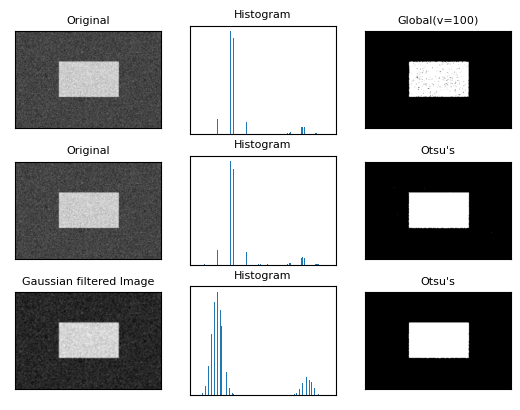

In [8]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./images/noisy.png', 0)
# 固定阈值法
ret1, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# Otsu阈值法
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 先进行高斯滤波，再使用Otsu阈值法
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original', 'Histogram', 'Global(v=100)',
          'Original', 'Histogram', "Otsu's",
          'Gaussian filtered Image', 'Histogram', "Otsu's"]

for i in range(3):
    # 绘制原图
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3], fontsize=8)
    plt.xticks([]), plt.yticks([])

    # 绘制直方图plt.hist, ravel函数将数组降成一维
    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1], fontsize=8)
    plt.xticks([]), plt.yticks([])

    # 绘制阈值图
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

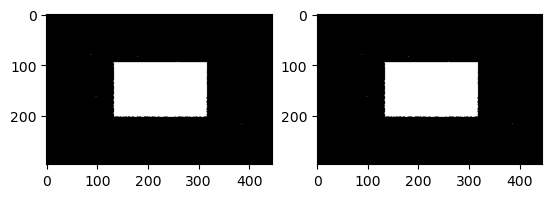

In [17]:
#Otsu源码
import numpy as np


def OTSU_enhance(img_gray, th_begin=0, th_end=256, th_step=1):
    #"must input a gary_img"
    assert img_gray.ndim == 2

    max_g = 0
    suitable_th = 0
    for threshold in range(th_begin, th_end, th_step):
        bin_img = img_gray > threshold
        bin_img_inv = img_gray <= threshold
        fore_pix = np.sum(bin_img)
        back_pix = np.sum(bin_img_inv)
        if 0 == fore_pix:
            break
        if 0 == back_pix:
            continue

        w0 = float(fore_pix) / img_gray.size
        u0 = float(np.sum(img_gray * bin_img)) / fore_pix
        w1 = float(back_pix) / img_gray.size
        u1 = float(np.sum(img_gray * bin_img_inv)) / back_pix
        # intra-class variance
        g = w0 * w1 * (u0 - u1) * (u0 - u1)
        if g > max_g:
            max_g = g
            suitable_th = threshold
    return suitable_th


img = cv2.imread('images/noisy.png', 0)
thresh = OTSU_enhance(img)
ret1, th1 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(1, 2, 1)
a = plt.imshow(th1, cmap='gray')
plt.subplot(1, 2, 2)
b = plt.imshow(th2, cmap='gray')
plt.show(b)


### 2.2.3 Triangle 方法

要使用 OpenCV 实现基于三角形方法（Triangle thresholding）的图像分割，可以利用 OpenCV 的 `cv2.threshold` 函数。虽然 OpenCV 自带了 Otsu 和其他阈值方法，但并没有直接提供三角形方法。因此，我们需要手动实现基于直方图的三角形阈值算法。以下是实现步骤和代码：

### 三角形方法概述：
三角形方法是一种基于图像直方图的自动阈值选择方法。它使用直方图中最高峰与最远边界之间的最大距离确定最佳阈值。

### 实现步骤：
1. 计算图像的灰度直方图。
2. 在直方图中找到峰值（最大频率）。
3. 计算从峰值到最远边界（直方图末端）的直线。
4. 找到距离直线最远的点，该点对应的灰度值即为阈值。

### 代码实现：

OpenCV 4.5.2 及以上版本已经通过 `cv2.THRESH_TRIANGLE` 选项支持了三角形阈值方法。这意味着我们可以直接调用 `cv2.threshold` 函数，而不需要手动实现三角形方法。

### 示例代码：

```python

```

### 解释：
- `cv2.THRESH_TRIANGLE`：直接调用三角形阈值法。
- `cv2.THRESH_BINARY`：应用二值化。
- 阈值参数设为 `0`，意味着 OpenCV 会根据图像自动计算适当的阈值。

这样就能直接使用 OpenCV 的内置函数，无需手动实现。

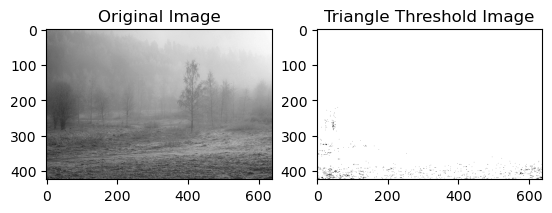

In [54]:
import cv2
import matplotlib.pyplot as plt

# 读取灰度图像
image = cv2.imread('images/Landscape4ContrastStretching.png', cv2.IMREAD_GRAYSCALE)

# 使用三角形阈值法
_, triangle_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

# 显示原始图像和使用三角形阈值法分割后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(triangle_threshold, cmap='gray')
plt.title('Triangle Threshold Image')
plt.show()

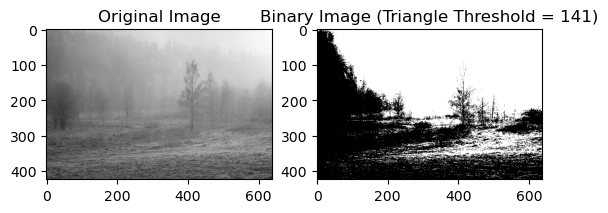

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并转换为灰度图像
image = cv2.imread('images/Landscape4ContrastStretching.png', cv2.IMREAD_GRAYSCALE)

# 计算图像的直方图
hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()

# 找到直方图的峰值位置
peak_index = np.argmax(hist)
max_value = hist[peak_index]

# 找到直方图的边界值（灰度值为0或255的端点）
left_bound = np.min(np.where(hist > 0))
right_bound = np.max(np.where(hist > 0))

# 计算从峰值到边界的直线的斜率
if (peak_index - left_bound) > (right_bound - peak_index):
    start, end = left_bound, peak_index
else:
    start, end = peak_index, right_bound


# 定义函数来计算点到直线的距离
def distance_from_line(hist_value, start_value, end_value, start_index, end_index):
    return abs((end_value - start_value) * (hist_value - start_index) -
               (end_index - start_index) * (hist_value - start_value)) / np.sqrt((end_value - start_value) ** 2 + (end_index - start_index) ** 2)


# 找到距离直线最远的点，作为阈值
distances = [distance_from_line(hist[i], hist[start], hist[end], start, end) for i in range(start, end + 1)]
threshold = start + np.argmax(distances)

# 使用计算得到的阈值对图像进行二值化
_, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

# 显示原始图像和二值化图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image (Triangle Threshold = {threshold})')
plt.show()





### 代码说明：
1. **计算直方图**：使用 `cv2.calcHist` 计算灰度图像的直方图。
2. **寻找峰值**：通过 `np.argmax(hist)` 找到直方图中的最高峰。
3. **计算直线**：通过比较峰值到两边界的距离，选择适当的端点，计算从峰值到端点的直线。
4. **计算距离**：对每个灰度值，计算它到直线的距离，并找到距离最大的点，作为阈值。
5. **图像分割**：使用 `cv2.threshold` 根据计算出的阈值进行图像分割。

这个实现将使用三角形方法自动计算图像的最佳阈值，并生成二值化后的图像。

OpenCV 4.5.2 及以上版本已经通过 `cv2.THRESH_TRIANGLE` 选项支持了三角形阈值方法。这意味着我们可以直接调用 `cv2.threshold` 函数，而不需要手动实现三角形方法。

### 示例代码：

```python
import cv2
import matplotlib.pyplot as plt

# 读取灰度图像
image = cv2.imread('images/Landscape4Thresholding.png', cv2.IMREAD_GRAYSCALE)

# 使用三角形阈值法
_, triangle_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

# 显示原始图像和使用三角形阈值法分割后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(triangle_threshold, cmap='gray')
plt.title('Triangle Threshold Image')
plt.show()
```

### 解释：
- `cv2.THRESH_TRIANGLE`：直接调用三角形阈值法。
- `cv2.THRESH_BINARY`：应用二值化。
- 阈值参数设为 `0`，意味着 OpenCV 会根据图像自动计算适当的阈值。

这样就能直接使用 OpenCV 的内置函数，无需手动实现。


### 2.2.1 自适应阈值法

函数：`cv2.adaptiveThreshold()`

参数说明：
- 参数1：要处理的原图
- 参数2：最大阈值，一般为255
- 参数3：小区域阈值的计算方式
  - `ADAPTIVE_THRESH_MEAN_C`：小区域内取均值
  - `ADAPTIVE_THRESH_GAUSSIAN_C`：小区域内加权求和，权重是个高斯核
- 参数4：阈值方式（跟前面讲的那5种相同）
- 参数5：小区域的面积，如 11 就是 $11\times11$ 的小块
- 参数6：最终阈值等于小区域计算出的阈值再减去此值

特点：自适应阈值会每次取图片的一小部分计算阈值，这样图片不同区域的阈值就不尽相同，适用于明暗分布不均的图片。

In [ ]:
# 自适应阈值与固定阈值对比
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/paper2.png', 0)

# 固定阈值
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# 自适应阈值
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)
#全局阈值，均值自适应，高斯加权自适应对比
titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()


# 6. Log

对数变换主要用于扩展图像的暗部细节。基本的数学原理很简单，如果有一个像素值为 $r$，其对数变换后的值 $s$ 由以下公式确定：

$$
s=c\log(1+r)
$$

其中，$c$ 是常数，用来调节输出的范围，通常可以基于需要的输出像素范围来选择。
- 将窄范围的低灰度值映射到更宽范围的输出值，高灰度值则相反
- 扩大暗像素的值或抑制图片中的较高灰度值。

解释
- 目的：对数变换将较低的像素值映射到更广泛的输出范围，而将较高的像素值压缩到较小的输出范围。这意味着在图像的暗部（低像素值）会有更多的对比度和细节。
- 对数函数的性质：对数函数在其值较小（接近0）时增长得很快，但随着其值的增加，增长速度会逐渐减慢。这意味着对于暗的像素值，对数变换会有一个较大的增长，但随着像素值的增加，增长率会减小。
- 应用场景：对数变换尤其适用于图像具有过暗和过亮区域的情况。例如，当在一个大范围的亮度下拍摄一张照片时（如背光的情况），对数变换可以帮助增强图像中的暗部细节。
- 1的添加：在公式中，我们向像素值r添加了1，这是为了防止当r=0时对数值变得无穷大。这确保了所有的输入像素值都会有一个有效的输出值。

实际应用中，可能需要对整个图像或特定区域进行对数变换，以达到增强的效果。此外，常数 $c$ 的选择也会影响增强的效果，因此可能需要进行一些实验来确定最佳值。

<img src="assets/log.png" width="800"/>

In [ ]:
# 彩色直方图均衡化
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))

img = cv2.imread("./images2/dark1.jpg")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 将图像数据转换为浮点数以进行计算
(b, g, r) = [np.float32(i) for i in cv2.split(img)]
# 对数变换
b_log = cv2.log(1 + b)
g_log = cv2.log(1 + g)
r_log = cv2.log(1 + r)
# 合并每一个通道
log_image = cv2.merge((r_log, g_log, b_log))
# 缩放到[0, 255]范围内
scaled_log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
scaled_log_image = np.uint8(scaled_log_image)  # 转回8位无符号整数

plt.subplot(1, 2, 2)
plt.imshow(scaled_log_image)
plt.show()

`cv2.normalize` 是 OpenCV 中的一个函数，它用于将数组或图像数据规范化到指定的范围。它可以根据指定的范围和规范化类型来进行线性规范化或其他类型的规范化。

函数的一般形式如下：
```python
cv2.normalize(src, dst, alpha, beta, norm_type, dtype, mask)
```

参数解释：
- **src**：输入数组或图像。
- **dst**：输出数组，通常为`None`，输出结果会返回。
- **alpha**：规范化范围的下界。
- **beta**：规范化范围的上界。
- **norm_type**：规范化类型，如 `cv2.NORM_MINMAX`（线性规范化到 [alpha, beta] 范围）、`cv2.NORM_INF`、`cv2.NORM_L1`、`cv2.NORM_L2` 等。
- **dtype**：输出数组的类型。通常设置为`-1`，表示与输入数组相同。
- **mask**：操作掩码。它指定了哪些元素被考虑进行规范化。通常为`None`，表示处理整个图像。

`cv2.normalize` 可以对 RGB 图片进行操作。当你传入一个彩色图像时，每个通道独立地进行规范化。这意味着红、绿和蓝三个通道分别被规范化，然后组合回一个彩色图像。

这段代码对 RGB 图像的每个通道独立进行规范化。在某些应用中，这可能会导致颜色变化。如果需要保持原始的颜色关系，可能需要将图像转换到其他颜色空间（如HSV），然后只对特定的通道（例如亮度）进行规范化。


# 7. Power

Gamma变换是对输入图像灰度值进行的非线性操作，使输出图像灰度值与输入图像灰度值呈指数关系：
$$
V_{\rm out}=AV_{\rm in}^{\gamma}
$$
目的：Gamma变换就是用来图像增强，其提升了暗部细节，通过非线性变换，让图像从暴光强度的线性响应变得更接近人眼感受的响应，即将漂白（相机曝光）或过暗（曝光不足）的图片，进行矫正。

gamma 大于 1，图片会更亮，反之变暗

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images2/dark1.jpg')


def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image, table)


img_gamma = adjust_gamma(img, 0.8)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_gamma)
plt.show()

`cv2.LUT()` 是 OpenCV 中的一个函数，用于对输入图像的每个像素值进行查找表（Look-Up Table，LUT）转换。这是一个简单但非常强大的工具，经常用于实现各种图像增强或调整操作。

函数的原型：
```python
dst = cv2.LUT(src, lut)
```

参数解释：
- **src** (`src` 在这里被称为 `image`): 输入图像。
- **lut** (`lut` 在这里被称为 `table`): 查找表，一个数组，其中索引表示输入像素值，索引位置的值表示输出像素值。

返回值：
- **dst**: 转换后的图像。

查找表（LUT）本质上是一个数组，它定义了如何映射输入像素值到输出像素值。例如，如果我们有一个简单的8位图像（像素值在0到255之间），我们的LUT可能也是一个256元素的数组。LUT中索引为0的值是输入像素值0应该被映射到的值，索引为1的值是输入像素值1应该被映射到的值，依此类推。

这个方法的一个常见用途是进行非线性对比度增强。例如，我们可以使用一个S型曲线的LUT来增强图像的对比度。

**示例**:
假设我们想要将所有像素值小于128的像素都映射为0，而大于或等于128的像素值都映射为255（这是一个简化的二值化效果），我们可以使用以下查找表：

```python
import numpy as np
import cv2

# 创建查找表
lut = np.zeros(256, dtype=np.uint8)
lut[128:] = 255

# 读取图像
image = cv2.imread('path_to_image.jpg', cv2.IMREAD_GRAYSCALE)

# 使用 LUT 进行转换
binary_image = cv2.LUT(image, lut)

# 显示结果
cv2.imshow('Original', image)
cv2.imshow('Binary', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

这个简单的LUT转换了输入图像，使其具有更高的对比度。在实际应用中，LUT 可以更加复杂，并用于实现各种图像处理效果。


<img src="assets/gamma_correct.png" width="800"/>

横坐标是输入灰度值，纵坐标是输出灰度值，蓝色曲线是gamma值小于1时的输入输出关系，红色曲线是gamma值大于1时的输入输出关系。可以观察到，当gamma值小于1时(蓝色曲线)，图像的整体亮度值得到提升，同时低灰度处的对比度得到增加，更利于分辩低灰度值时的图像细节。

In [ ]:
# 彩色直方图均衡化
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))

img = cv2.imread("./images2/dark1.jpg")
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 将图像数据转换为浮点数以进行计算
(b, g, r) = [np.float32(i) for i in cv2.split(img)]
# 对数变换
b_log = cv2.log(1 + b)
g_log = cv2.log(1 + g)
r_log = cv2.log(1 + r)
# 合并每一个通道
log_image = cv2.merge((r_log, g_log, b_log))
plt.subplot(1, 3, 2)
plt.imshow(log_image)
# 缩放到[0, 255]范围内
scaled_log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
scaled_log_image = np.uint8(scaled_log_image)  # 转回8位无符号整数
plt.subplot(1, 3, 3)
plt.imshow(scaled_log_image)
plt.show()

这个警告信息是由matplotlib库的`imshow()`函数产生的，当你试图显示RGB图像数据时。它表示你的图像数据超出了`imshow()`函数对于RGB数据的有效范围。具体来说，对于RGB图像数据：

- 如果数据类型是浮点数（例如 `float32` 或 `float64`），像素值必须在 [0, 1] 的范围内。
- 如果数据类型是整数（例如 `uint8`），像素值必须在 [0, 255] 的范围内。

超出这些范围的值将被“裁剪”或“限制”在有效范围内，这可能会导致显示的图像颜色失真。

**如何解决**：

1. **确保数据类型和值的范围匹配**:
   - 如果你的图像数据是浮点数，确保其值在 [0, 1] 范围内。
   - 如果你的图像数据是整数，确保其值在 [0, 255] 范围内。

2. **转换数据类型**:
   如果你有一个浮点数类型的图像，其值范围是 [0, 255]，你可以将其转换为 [0, 1] 范围：
   ```python
   image = image / 255.0
   ```

3. **使用clip函数**:
   你可以使用NumPy的`clip()`函数确保所有的像素值都在有效范围内：
   ```python
   import numpy as np
   image = np.clip(image, 0, 255)
   ```

之后，使用`imshow()`函数显示图像时就不会再收到此警告信息。



# 8. 灰度级切片



# 9. 直方图均衡与匹配


## 直方图均衡化

Histogram Procesing（重点）

- Histogram Equalization 均衡
  - 在整个亮度范围内获得具有均匀分布的亮度级别的图像
  - 在图像对比度低的时候可以使用
- Histogram Matching
  - 获取具有指定直方图（亮度分布）的图像

理论计算

- 对于离散值，我们得到 probabilities 和 summations，而不是 p.d.fs 和积分

$$
p_r(r_k)=n_k/(MN),\quad k=0,1,...,L-1
$$

- 其中 $MN$ 是图像中的总像素数，$n_k$ 是具有灰度值为 $r_k$ 的像素数，$L$ 是总灰度值数，$k$ 是 0 到 255 中的数

所以
$$
s_k=T(r_k)=(L-1)\sum\limits_{j=0}^k p_r(r_j)=\frac{L-1}{MN}\sum\limits_{j=0}^k n_j\\
k=0,1,...,L-1
$$
这种变换称为直方图均衡。然而，在实际应用中，获得完全均匀分布（离散版本）是很少见的。


和灰度值有关的变量有 2 个
  - $k$ 和 $r_k$


![](assets/histgram_equal.png)






目的
- 直方图均衡化是将原图像通过某种变换，得到一幅灰度直方图为均匀分布的新图像的方法。
- 直方图均衡化方法的基本思想是对在图像中像素个数多的灰度级进行展宽，而对像素个数少的灰度级进行缩减。从而达到清晰图像的目的。


#### 全局直方图均衡化
函数：`cv2.equalizeHist(img)`
- 参数1： 待均衡化图像

步骤
- 统计直方图中每个灰度级出现的次数
- 计算累计归一化直方图
- 重新计算像素点的像素值


In [ ]:
# 灰度直方图均衡化
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

#直接读为灰度图像
img = cv2.imread('./images2/dark.png', 0)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#调用cv2.equalizeHist函数进行直方图均衡化
img_equal = cv2.equalizeHist(img)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_equal, cv2.COLOR_BGR2RGB))
plt.show()

#### 局部直方图均衡化

`cv2.createCLAHE(clipLimit, tileGridSize)` 是OpenCV中创建CLAHE (Contrast Limited Adaptive Histogram Equalization) 对象的函数。CLAHE是一种局部直方图均衡化的方法。
- `clipLimit`: 这是对局部区域内的对比度的限制。它是一个阈值，超过该阈值的直方图bin将被裁剪，多余的计数会均匀地分布到其他bins中。这有助于减少噪音对增强的影响。
    -  首先，要了解`clipLimit`是如何工作的，我们需要回顾直方图均衡化的基础原理。直方图均衡化的目的是重新调整图像的像素强度，使其直方图（也就是像素强度的分布）尽可能均匀。在局部直方图均衡化中，每个小块或"tile"都有自己的直方图。在CLAHE中，`clipLimit`是为了防止因局部噪音或局部对比度差异而导致的过度增强。在某些情况下，一个小块内部的某些像素强度可能会有异常高的频率，即直方图中的某个bin的值可能会异常高。这里就是`clipLimit`起作用的地方：
        - 1. 对于每个小块的直方图，任何超过`clipLimit`的bin都会被“裁剪”到这个限制。
        - 2. 被裁剪掉的计数不会被丢弃，而是均匀地分散到这个小块的其他bins中。
        - 这样，局部的强度峰值或噪声不会导致过度的对比度增强，因为它们已经被限制并均匀分布了。
    - 举个例子：假设我们有一个8级的灰度图像（像素值从0到7），并且我们正在查看一个特定的小块的直方图。直方图如下：
    ```
    像素值:     0   1   2   3   4   5   6   7
    频数:      10  50  5   3   4   5   10  8
    ```
    - 在这个直方图中，像素值为1的频数异常高。如果我们设置`clipLimit`为20，那么像素值为1的频数将从50减少到20，多出来的30会均匀地分散到其他的bins中。经过裁剪和重新分配后，调整后的直方图可能如下：（注意：上述分配只是一个大致的例子，实际分配可能略有不同。）
    ```
    像素值:     0   1   2   3   4   5   6   7
    频数:      14  20  8   6   7   8   13  11
    ```
    - 通过这种方式，`clipLimit`确保了直方图的均衡化不会因为异常高的bin而过度扭曲，从而避免了因噪音或其他局部特征导致的过度增强。
- `tileGridSize`: 定义了将图像分割为多少小块来独立地应用直方图均衡化。在此例中，每个小块的大小是30x30像素。

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


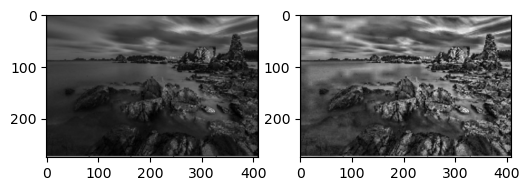

In [1]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

#直接读为灰度图像
img = cv2.imread('./images2/dark.png', 0)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#调用cv2.createCLAHE函数进行局部直方图均衡化
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(30, 30))
cl1 = clahe.apply(img)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cl1, cv2.COLOR_BGR2RGB))
plt.show()

#### 两种直方图均衡化对比
直方图均衡化 (Histogram Equalization):
- 它是一种提高图像对比度的方法，通过拉伸图像的直方图使其占据整个255级的灰度级别。
- 这是一种全局操作，即整张图像的所有像素都用于计算直方图，并基于此均衡化整张图像。
- 在某些情况下，这可能会导致一些区域过度增强或失去细节。

局部直方图均衡化 (Adaptive Histogram Equalization):
- 与全局直方图均衡化不同，这种方法将图像分割成小块（或“tiles”），然后在每个小块上独立地进行直方图均衡化。
- 这样可以确保局部的对比度得到增强，而不会过度影响整个图像。
- CLAHE是这种方法的一个变种，它进一步限制了每个小块内的对比度，以防止噪音放大。

直方图均衡化 vs 局部直方图均衡化:
- 直方图均衡化考虑整张图像的对比度，而局部直方图均衡化关注图像的小部分，因此它更能够处理图像中对比度不均的区域。
- 对于在整个图像中对比度都很低的图像，全局直方图均衡化可能会工作得很好。但是，对于只有部分区域对比度低的图像，局部直方图均衡化（如CLAHE）可能会提供更好的结果，因为它可以单独增强这些区域而不影响其他已经具有良好对比度的区域。
- 总之，选择哪种方法取决于特定的应用和图像特性。

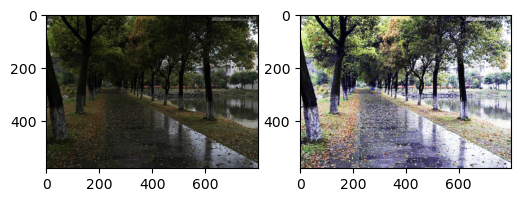

In [2]:
# 彩色直方图均衡化
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

img = cv2.imread("./images2/dark1.jpg")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 彩色图像均衡化,需要分解通道 对每一个通道均衡化
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
# 合并每一个通道
result = cv2.merge((bH, gH, rH))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()


# 10. 算数与逻辑运算


## 算数运算

在计算机视觉中，图像的算术与逻辑运算是非常基础且常用的操作。我们可以对两幅图像进行像素级别的操作来生成新的图像，常见的运算包括：

- **加法（Addition）：** 对两幅图像的对应像素值进行相加操作。
- **减法（Subtraction）：** 对两幅图像的对应像素值进行相减操作。

通常用于图像的背景移除、运动检测等场景。例如，我们可以通过减去背景图像，来突出运动物体。


![](images/subtract.png)

In [ ]:
import cv2
import numpy as np

# 读取两幅图像
img1 = cv2.imread('input1.jpg')
img2 = cv2.imread('input2.jpg')

# 加法运算
add_result = cv2.add(img1, img2)

# 减法运算
sub_result = cv2.subtract(img1, img2)

# 显示结果
cv2.imshow('Addition Result', add_result)
cv2.imshow('Subtraction Result', sub_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

![](images/and.png)

![](images/or.png)

## Bitwise逻辑运算 And/Or

逻辑运算允许我们基于布尔逻辑对图像进行操作，常见的有以下几种：
- **按位与 (AND)：** 只有当两幅图像的对应像素都是非零时，结果图像的像素才为非零。常用于应用蒙版以筛选特定区域。
- **按位或 (OR)：** 只要两幅图像的对应像素有一个非零，结果图像的像素就为非零。常用于图像的融合。
- **按位非 (NOT)：** 将图像中所有的非零像素变为零，零像素变为非零。常用于反转图像或获取图像负片效果。



为了演示按位与与按位或运算，我们先创建一个简单的掩码（mask），然后应用于图像上。




### `cv2.bitwise_and` 函数

用于对两幅图像的像素进行按位与运算。按位与运算会保留两幅图像对应像素同时为非零的部分，其他像素会被置为零。这个操作在处理图像掩码时非常有用，可以用来提取特定区域的图像。

函数定义：
```python
cv2.bitwise_and(src1, src2[, dst[, mask]])
```

- **`src1`**: 第一幅输入图像，必须与第二幅图像大小和通道数一致。
- **`src2`**: 第二幅输入图像，与 `src1` 相同大小。
- **`mask`**: 可选的掩码。如果提供，则按位与只会在掩码非零的区域进行。


代码示例：

```python
import cv2
import numpy as np

# 读取两幅相同大小的图像
img1 = cv2.imread('input1.jpg')
img2 = cv2.imread('input2.jpg')

# 创建一个简单的矩形掩码 (白色区域表示需要保留的部分)
mask = np.zeros(img1.shape[:2], dtype="uint8")
cv2.rectangle(mask, (100, 100), (300, 300), 255, -1)  # 在图像上绘制白色矩形

# 使用按位与操作
and_result = cv2.bitwise_and(img1, img2)

# 使用按位与操作结合掩码，只处理掩码白色区域
and_with_mask_result = cv2.bitwise_and(img1, img2, mask=mask)

# 显示结果
cv2.imshow('Bitwise AND', and_result)
cv2.imshow('Bitwise AND with Mask', and_with_mask_result)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

解释：
- **`and_result`**: 没有掩码的按位与操作，结果图像将会显示 `img1` 和 `img2` 中像素均为非零的部分。
- **`and_with_mask_result`**: 使用掩码进行按位与操作，只有在掩码为白色的区域才会进行图像的按位与操作。


### `cv2.bitwise_or` 函数

`cv2.bitwise_or` 用于对两幅图像的像素进行按位或运算。按位或运算会保留两幅图像中任意一个图像的非零像素区域，即只要两幅图像中有一个像素是非零，结果中的像素也将是非零。

```python
cv2.bitwise_or(src1, src2[, dst[, mask]])
```

- **`src1`**: 第一幅输入图像，大小和通道数必须与第二幅图像一致。
- **`src2`**: 第二幅输入图像，必须与 `src1` 大小一致。
- **`mask`**: 可选的掩码。只在掩码非零的区域进行按位或操作。

代码示例：

```python
import cv2
import numpy as np

# 读取两幅相同大小的图像
img1 = cv2.imread('input1.jpg')
img2 = cv2.imread('input2.jpg')

# 使用按位或操作
or_result = cv2.bitwise_or(img1, img2)

# 创建掩码
mask = np.zeros(img1.shape[:2], dtype="uint8")
cv2.rectangle(mask, (100, 100), (300, 300), 255, -1)  # 在图像上绘制白色矩形

# 使用掩码进行按位或操作
or_with_mask_result = cv2.bitwise_or(img1, img2, mask=mask)

# 显示结果
cv2.imshow('Bitwise OR', or_result)
cv2.imshow('Bitwise OR with Mask', or_with_mask_result)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

解释：
- **`or_result`**: 对两幅图像进行按位或运算，结果图像将会显示两幅图像中任意一个像素非零的部分。
- **`or_with_mask_result`**: 使用掩码进行按位或运算，只有掩码中白色区域的像素参与运算。


- **`cv2.bitwise_and`** 适用于筛选图像的特定区域，尤其是在与掩码配合使用时，可以有效地提取图像中有意义的部分。
- **`cv2.bitwise_or`** 则用于融合图像，保留两幅图像中任意一个非零像素的部分。

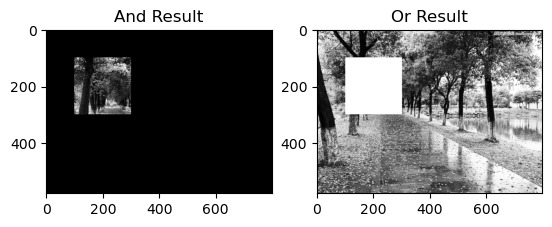

In [22]:
import numpy as np

# 创建掩码：黑白图像，白色部分代表需要保留的区域
# mask = np.zeros(result.shape[:2], dtype="uint8")
img = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
mask = np.zeros(img.shape, dtype="uint8")
cv2.rectangle(mask, (100, 100), (300, 300), 255, -1)  # 绘制一个白色矩形掩码

# 使用按位与操作，只保留掩码白色区域的原图像素
and_result = cv2.bitwise_and(img, mask)

# 按位或操作
or_result = cv2.bitwise_or(img, mask)

# 显示结果
plt.subplot(1, 2, 1)
plt.imshow(and_result, cmap='gray')
plt.title('And Result')

plt.subplot(1, 2, 2)
plt.imshow(or_result, cmap='gray')
plt.title('Or Result')
plt.show()

In [15]:
result.shape

(579, 800, 3)


## 总结

- **算术运算：** 加法和减法是对图像像素进行简单的数学运算，常用于图像增强、背景消除等任务。
- **逻辑运算：** 按位运算使我们能够基于掩码进行区域选择或图像融合，广泛应用于目标检测、图像合成等领域。
